In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [2]:
batch_size = 32
img_height = 224
img_width = 224
train_dir = 'marble/train'
test_dir = 'marble/test'

In [3]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="training",
  seed=123, 
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6447 files belonging to 4 classes.
Using 5158 files for training.


In [4]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6447 files belonging to 4 classes.
Using 1289 files for validation.


In [5]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 362 files belonging to 4 classes.


In [6]:
class_names = train_ds.class_names
print(class_names)

['crack', 'dot', 'good', 'joint']


In [7]:
class_names = test_ds.class_names
print(class_names)

['crack', 'dot', 'good', 'joint']


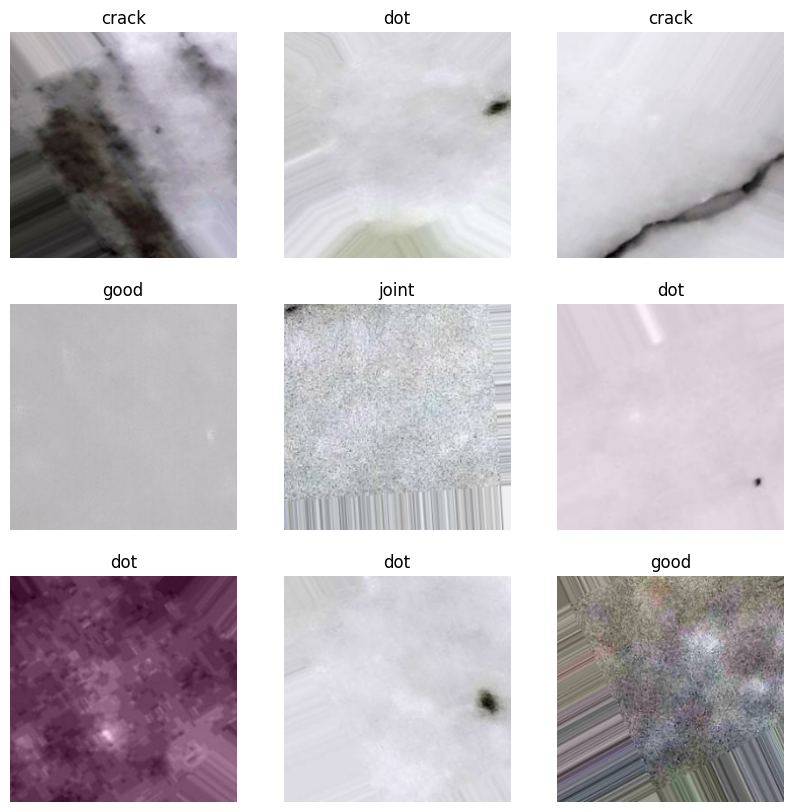

In [8]:
image_batch, label_batch = next(iter(train_ds))
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    label = label_batch[i]
    name = class_names[label]
    plt.title(name)
    plt.axis("off")

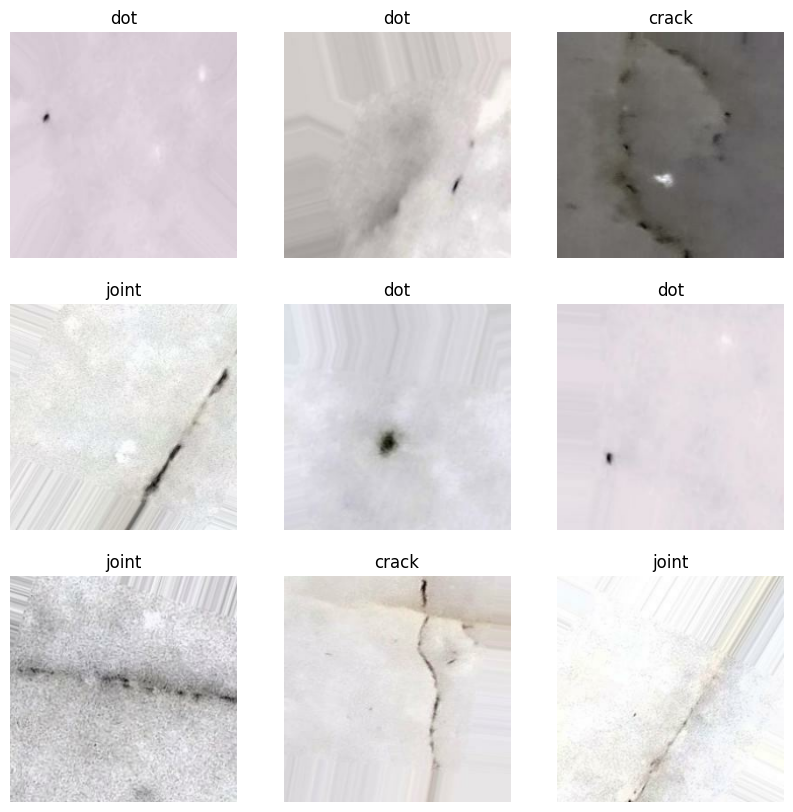

In [9]:
image_batch, label_batch = next(iter(val_ds))
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    label = label_batch[i]
    name = class_names[label]
    plt.title(name)
    plt.axis("off")

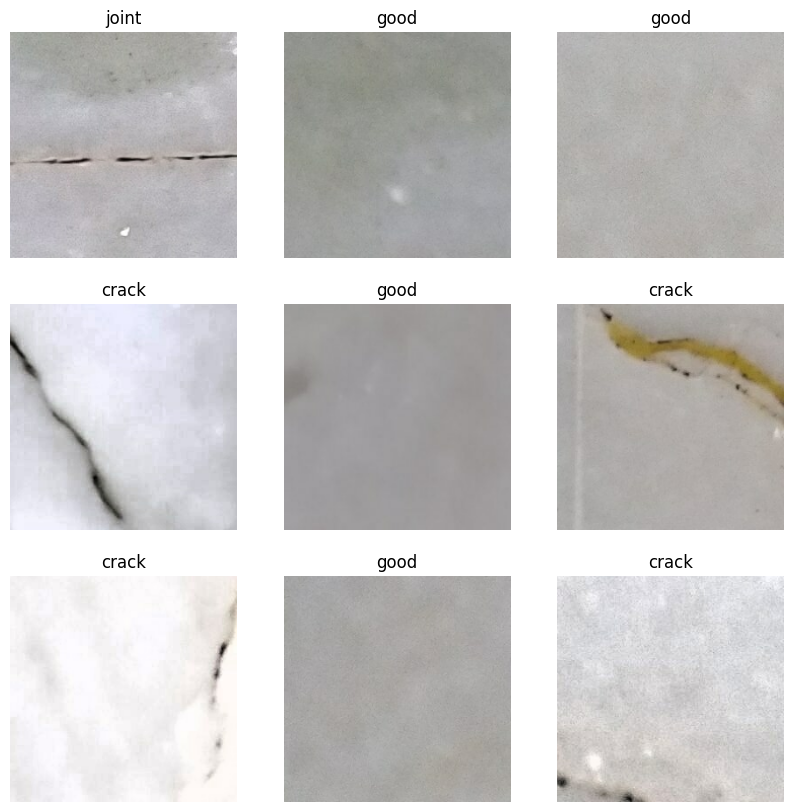

In [10]:
image_batch, label_batch = next(iter(test_ds))
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    label = label_batch[i]
    name = class_names[label]
    plt.title(name)
    plt.axis("off")

In [11]:
y_train = np.array([])

j = 0
for x, y in train_ds:
    if j ==0:
        x_train = tf.keras.applications.vgg16.preprocess_input(x)
        j = 1
    else:
        x_train = np.concatenate([x_train , tf.keras.applications.vgg16.preprocess_input(x)])
        
        
    y_train = np.concatenate([y_train , y.numpy()])
    
print("Train labels \n{} ".format(pd.Series(y_train).value_counts()))

Train labels 
1.0    1482
3.0    1354
2.0    1177
0.0    1145
dtype: int64 


In [12]:
y_val = np.array([])

j = 0
for x, y in val_ds:
    if j ==0:
        x_val = tf.keras.applications.vgg16.preprocess_input(x)
        j = 1
    else:
        x_val = np.concatenate([x_val , tf.keras.applications.vgg16.preprocess_input(x)])
        
        
    y_val = np.concatenate([y_val , y.numpy()])
    
print("Validation labels \n{} ".format(pd.Series(y_val).value_counts()))
print("\n")
print(x_val.shape)

Validation labels 
1.0    394
3.0    335
2.0    303
0.0    257
dtype: int64 


(1289, 224, 224, 3)


In [13]:
y_test = np.array([])

j = 0
for x, y in test_ds:
    if j ==0:
        x_test = tf.keras.applications.vgg16.preprocess_input(x)
        j = 1
    else:
        x_test = np.concatenate([x_test , tf.keras.applications.vgg16.preprocess_input(x)])
        
        
    y_test = np.concatenate([y_test , y.numpy()])
    
print("Test labels \n{} ".format(pd.Series(y_test).value_counts()))
print("\n")
print(x_test.shape)

Test labels 
2.0    130
0.0    130
3.0     78
1.0     24
dtype: int64 


(362, 224, 224, 3)


In [14]:
base_Net = tf.keras.applications.MobileNet(include_top = False, 
                         weights ='imagenet', 
                         input_shape = (224,224,3), 
                         pooling='avg')

base_Net.trainable = True

model_Net = tf.keras.models.Sequential()
model_Net.add(base_Net)
model_Net.add(tf.keras.layers.Dense(1024))
model_Net.add(tf.keras.layers.Dense(4, activation=tf.nn.softmax))

model_Net.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_Net.summary()

history = model_Net.fit(x_train ,y_train ,  validation_data = (x_val, y_val), epochs = 15, verbose = 1)

test_loss, test_acc = model_Net.evaluate(x_test , y_test)
print("Test image accuracy :{}".format(test_acc))

predicted_label = model_Net.predict(x_test)
predicted_label = np.argmax(predicted_label, axis=-1)

print(classification_report(y_test, predicted_label, target_names=class_names))
model_Net.save('models/marble_mobilenet_5k2.h5')



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 1024)             3228864   
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1024)              1049600   
                                                                 
 dense_1 (Dense)             (None, 4)                 4100      
                                                                 
Total params: 4,282,564
Trainable params: 4,260,676
Non-trainable params: 21,888
_________________________________________________________________
Epoch 1/10
162/162 [==============================] - 830s 5s/step - loss: 0.6671 - accuracy: 0.8881 - val_loss: 2.5754 - val_accuracy: 0.7572
Epoch 2/10
162/162 [==============================] - 767s 5s/step - loss: 0.1976 - accuracy: 0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


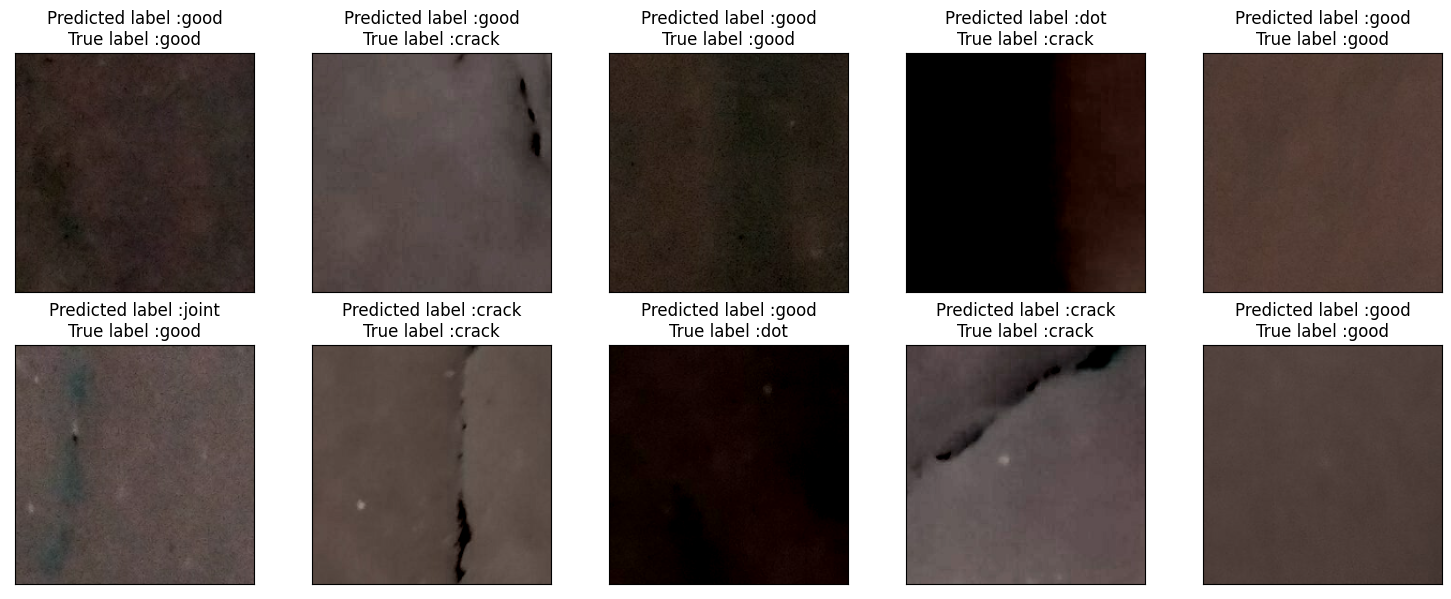

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6), subplot_kw={'xticks': [], 'yticks': []})
axes = axes.ravel()

predicted_label_int = predicted_label.astype(int)
y_test_int = y_test.astype(int)

x_test_norm = x_test / 255.0  # normalize pixel values

for i in range(10):
    axes[i].imshow(x_test_norm[i])
    axes[i].set_title("Predicted label :{}\nTrue label :{}".format(class_names[predicted_label_int[i]], class_names[y_test_int[i]]))
    
plt.tight_layout()
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

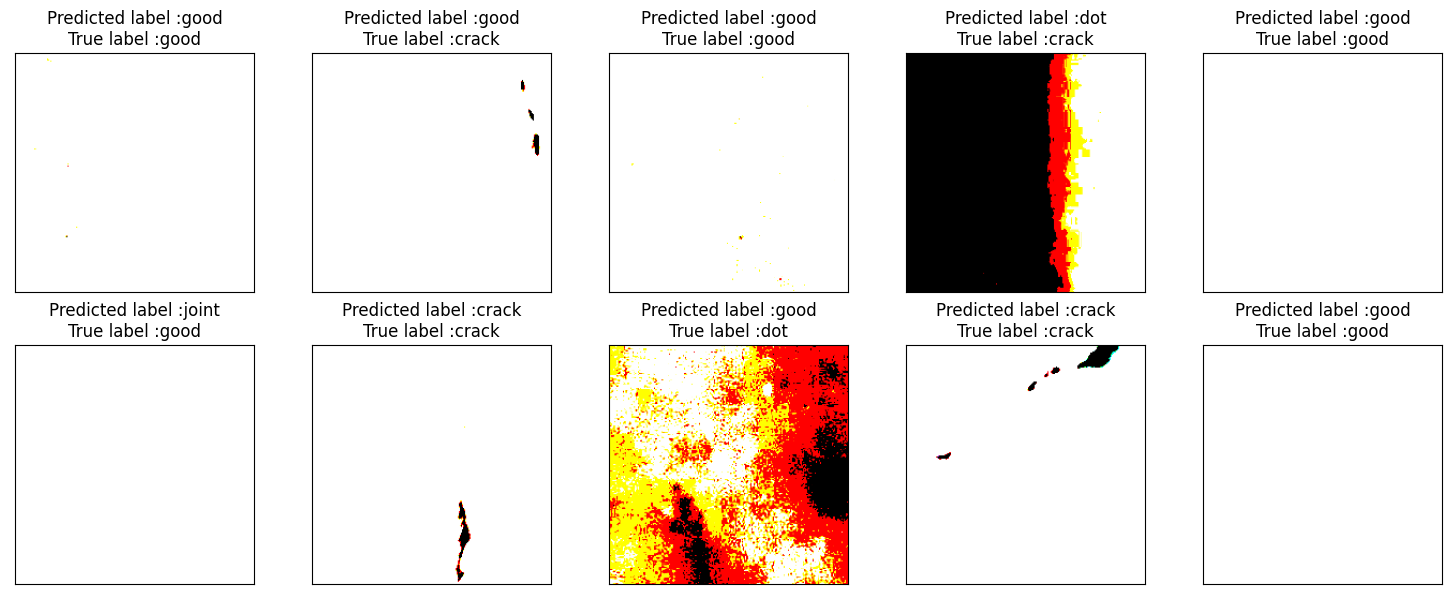

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6), subplot_kw={'xticks': [], 'yticks': []})
axes = axes.ravel()

predicted_label_int = predicted_label.astype(int)
y_test_int = y_test.astype(int)

for i in range(10):
    axes[i].imshow(x_test[i])
    axes[i].set_title("Predicted label :{}\nTrue label :{}".format(class_names[predicted_label_int[i]], class_names[y_test_int[i]]))
    
plt.tight_layout()
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_9944\2892441873.py:13: RuntimeWarning: invalid value encountered in power
  img = np.power(x_test_norm[i], gamma)


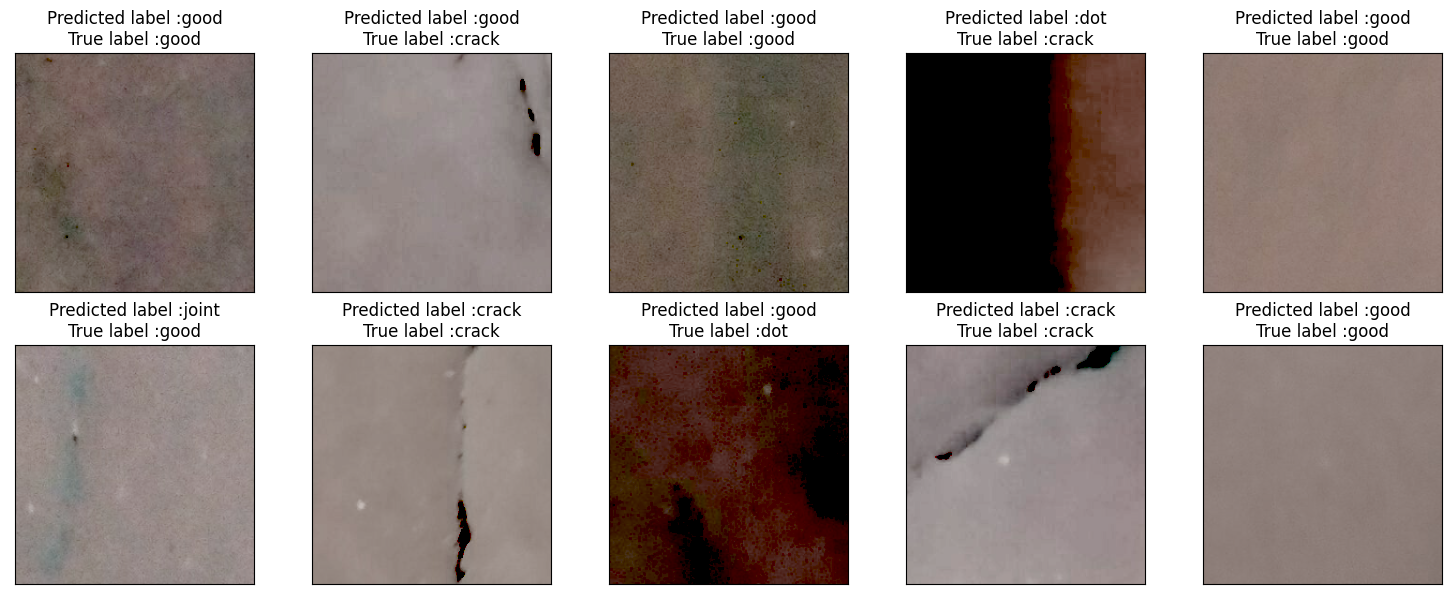

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6), subplot_kw={'xticks': [], 'yticks': []})
axes = axes.ravel()

predicted_label_int = predicted_label.astype(int)
y_test_int = y_test.astype(int)

x_test_norm = x_test / 255.0  # normalize pixel values

gamma = 0.5  # adjust gamma to increase brightness

for i in range(10):
    # apply gamma correction to increase brightness
    img = np.power(x_test_norm[i], gamma)
    
    axes[i].imshow(img)
    axes[i].set_title("Predicted label :{}\nTrue label :{}".format(class_names[predicted_label_int[i]], class_names[y_test_int[i]]))
    
plt.tight_layout()
plt.show()
